# 3장 신경망 시작하기

[케라스 창시자에게 배우는 딥러닝] 책을 기반으로 제가 정리하고 요약한 내용입니다.
하루에 한 chapter를 공부하고 요약합니다!

## 3.1 신경망의 구조

신경망 훈련에는 다음 요소들이 관련되어 있습니다.
* **네트워크(또는 모델)** 를 구성하는 **층**
* **입력 데이터**와 그에 상응하는 타깃
* 학습에 사용할 피드백 신호를 정의하는 **손실 함수**
* 학습 진행 방식을 결정하는 **옵티마이저**

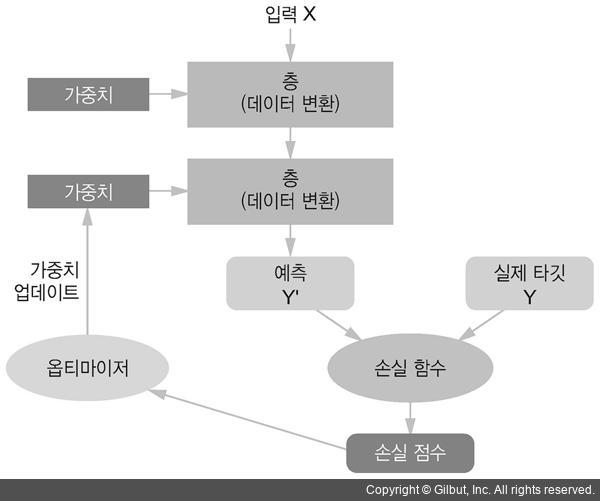

In [0]:
from IPython.display import Image
 
Image("learning.jpg")

### 3.1.1 층: 딥러닝의 구성 단위

층(layer)은 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈입니다. 대부분의 경우 **가중치**라는 층의 상태를 가집니다. 가중치는 **옵티마이저**에 의해 학습되는 하나 이상의 텐서이며 여기에 네트워크가 학습한 **지식**이 담겨 있습니다.

층마다의 적절한 텐서포멧과 데이터 처리방식:
* (samples, features) 크기의 2D 텐서(벡터) : **완전 연결 층**(fully connected layer)이나 **밀집 층**(dense layer)(Dense)
* (samples, timesteps, features) 크기의 3D 텐서(시퀀스) : 보통 LSTM같은 **순환 층**(recurrent layer)
* (samples, height, width, channels) 크기의 4D 텐서(이미지) : **2D 합성곱 층**(convolution layer)(Conv2D)

케라스에서는 이러한 층을 딥러닝의 레고 블럭처럼 생각할 수 있습니다. 케라스에서는 **층 호환성**을 이용해 호환 가능한 층들을 엮어 데이터 변환 파이프라인을 구성함으로써 딥러닝 모델을 만듭니다.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))

첫 번째 차원이 784인 2D 텐서만 입력 받는 층을 만들었습니다. 이 층은 첫 번째 차원 크기가 32이므로 32차원의 벡터를 입력으로 받는 하위 층이 연결되어야 합니다. 두 번째 층에는 input_shape 매개변수를 지정하지 않았지만 앞선 층의 출력 크기를 입력 크기로 자동으로 채택합니다.

### 3.1.2 모델: 층의 네트워크

딥러닝 모델은 층으로 만든 비순환 유향 그래프(Directed Acyclic Graph, DAG)입니다. 가장 일반적 예가 하나의 입력을 하나의 출력으로 매핑하는 층을 순서대로 쌓는 것입니다. 하지만 다양한 네트워크 구조가 있습니다.
* 가지(branch)가 2개인 네트워크
* 출력이 여러 개인 네트워크
* 인셉션(Inception) 블록

네트워크 구조는 **가설 공간**(hypothesis space)을 정의합니다. 네트워크 구조를 선택함으로써 가설 공간을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한하게 됩니다. 목표는 이런 텐서 연산에 포함된 가중치 텐서의 최적 값을 찾는 것 입니다.

### 3.1.3 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠

네트워크 구조를 저으이하고 나면 두 가지를 더 선택해야 합니다.
* **손실 함수**(loss function) : 훈련하는 동안 최소화될 값입니다. 주어진 문제에 대한 성공 지표가 됩니다.
* **옵티마이저**(optimizer) : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정합니다. 특정 종류의 SGD를 구현합니다.

문제에 맞는 올바른 손실 함수를 선택하는 것은 아주 중요합니다. 목적 함수가 주어진 문제의 성공과 전혀 관련이 없다면 원하지 않는 일을 수행하는 모델이 만들어질 것입니다.

일반적인 문제에서는 간단한 지침이 있습니다.
* 2개의 클래스 분류 문제 : 이진 크로스엔트로피(binary crossentropy)
* 여러 개의 클래스 분류 문제 : 범주형 크로스엔트로피(categorical crossentropy)
* 회귀 문제 : 평균 제곱 오차(mean square error)
* 시퀀스 학습 문제 : CTC(Connection Temporal Classification)

## 3.2 케라스 소개

케라스는 텐서플로 다음으로 많이 쓴다고 나와있습니다. 사실 머신러닝/딥러닝 입문을 텐서플로로 했는데 어느날 케라스를 접하고 나서 너무나 간단한 모델에 놀랐었습니다. 어차피 텐서플로 2.0에는 tf.keras 밀어주니까 케라스 공부하기 좋은 것 같습니다.

### 3.2.1 케라스, 텐서플로, 씨아노, CNTK

케라스는 딥러닝 모델을 만들기 위한 고수준의 구성 요소를 제공하는 모델 수준의 라이브러리입니다. 저는 백엔드 엔진으로 텐서플로 쓸겁니다.

### 3.2.2 케라스를 사용한 개발: 빠르게 둘러보기

전형적인 케라스 작업 흐름입니다.
1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터 정의
2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(또는 모델)를 정의
3. 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표를 선택하여 학습 과정을 설정
4. 훈련 데이터에 대해 모델의 fit() 메소드를 반복적으로 호출

모델을 정의하는 방법은 두가지입니다.
1. Sequential 클래스 : 층을 순서대로 쌓아 올린 네트워크
2. 함수형 API : 완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프

In [0]:
# Sequential 클래스 사용
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
# 함수형 API 사용
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

모델 구조가 정의된 후에는 동일한 단계를 거칩니다. 컴파일 단계에서 학습과정이 설정됩니다. 여기에서 모델이 사용할 옵티마이저와 손실 함수, 훈련하는 동안 모니터링하기 위해 필요한 측정 지표를 지정합니다. 마지막으로 입력 데이터의 넘파이 배열을 모델의 fit() 메소드에 전달함으로써 학습과정이 이루어집니다.

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## 3.3 딥러닝 컴퓨터 셋팅

저는 로컬 컴퓨터가 CPU를 사용하기 때문에 사실 딥러닝을 공부하기에 많이 힘듭니다. 그래서 저는 구글의 코랩으로 GPU를 사용합니다! 물론 하루 최대 12시간 제한과 RAM제한 때문에 곤란한 상황이 많지만 그래도 공짜 GPU에 정말 만족합니다.. 코랩은 말안해도 다 아실거라 믿고 이부분은 넘어가겠습니다.

### 3.3.1 주피터 노트북: 딥러닝 실험을 위한 최적의 방법

코랩은 ide가 주피터 노트북 형식입니다.

### 3.3.2 케라스 시작하기: 두가지 방법

생략

### 3.3.3 클라우드에서 딥러닝 작업을 수행했을 때 장단점

클라우드에서 실행하면 물론 가입하면 돈을 주긴하지만 오래 쓰려면 돈내야해서 그냥 코랩씁시다!

### 3.3.4 어떤 GPU 카드가 딥러닝에 최적일까?

생략

## 3.4 영화 리뷰 분류: 이진 분류 예제

리뷰 테스트를 기반으로 영화 리뷰를 긍정(positive)과 부정(negative)으로 분류하는 방법을 배우겠습니다.

### 3.4.1 IMDB 데이터셋

인터넷 영화 데이터베이스(Internet Movie Database)로부터 가져온 양극단의 리뷰 5만개로 이루어진 IMDB 데이터셋을 사용하겠습니다. 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 긍정, 50%는 부정 리뷰로 구성되어 있습니다.

In [0]:
# 코드 3-1 IMDB 데이터셋 로드하기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


```num_words=10000``` 는 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미입니다. 즉, 드물게 나타나는 단어는 무시하겠다는 의미입니다.

In [0]:
max([max(sequence) for sequence in train_data]) # 1만 개로 제한했기 때문에 단어 인덱스는 9,999를 넘지 않습니다.

9999

### 3.4.2 데이터 준비

신경망에 숫자 리스트를 주입할 수 없기 때문에 이 리스트를 텐서로 바꾸는 방법이 필요합니다.
1. 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환합니다. 그 다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용합니다.(Embedding 층)
2. 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환합니다.

여기선 2번째 방식을 사용합니다.

In [0]:
# 코드 3-2 정수 시퀀스를 이진 행렬로 인코딩하기

import numpy as np

# one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 3.4.3 신경망 모델 만들기

입력 데이터가 벡터고 레이블은 스칼라(1 또는 0)입니다. 이런 간단한 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전 연결 층  
```(Dense(16, activation='relu'))```을 그냥 쌓은 것입니다. Dense 층에 전달한 매개변수(16)는 **은닉 유닛**(hidden unit)의 개수입니다.

2장에서 relu 활성화 함수를 사용한 Dense 층을 다음 텐서 연산을 연결하여 구현했습니다.

In [0]:
output = relu(dot(W, input) + b)

16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻입니다. 은닉 유닛을 통해 신경망을 복잡하게 할 수도 있고 간단하게 할 수도 있습니다.

Dense 층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요합니다.
* 얼마나 많은 층을 사용할 것인가?
* 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?

4장에서 이런 결정을 하는데 도움이 되는 원리를 배웁니다. 여기선 일단 필자를 믿고 다음 구조를 사용합니다.
* 16개의 은닉 유닛을 가진 2개의 은닉 층
* 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

중간에 있는 은닉 층은 활성화 함수로 **relu**를 사용하고 마지막 층은 출력값을 [0, 1] 사이의 확률로 출력해야 하므로 활성화 함수로 **sigmoid**를 사용합니다.

In [0]:
# 코드 3-3 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


**여기서 활성화 함수에 비선형 함수를 사용하는 이유는 무엇일까요?**

저는 [밑바닥부터 시작하는 딥러닝]의 글귀를 인용해 보겠습니다.  
```선형 함수인 h(x)=cx를 활성 함수로 사용한 3층 네트워크를 떠올려 보세요. 이를 식으로 나타내면 y(x)=h(h(h(x)))가 됩니다. 이 계산은 y(x)=c∗c∗c∗x처럼 세번의 곱셈을 수행하지만 실은 y(x)=ax와 똑같은 식입니다. a=c3이라고만 하면 끝이죠. 즉 히든레이어가 없는 네트워크로 표현할 수 있습니다. 그래서 층을 쌓는 혜택을 얻고 싶다면 활성함수로는 반드시 비선형함수를 사용해야 합니다.```

이제 손실 함수와 옵티마이저를 선택해야 합니다.
* 이진 분류 문제, 신경망의 출력이 확률 : binary_crossentropy (mean_squared_error도 사용 가능)
* 옵티마이저 : RMSprop
* 측정 지표 : accuracy

In [0]:
# 코드 3-4 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

가끔 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있습니다.

In [0]:
# 코드 3-5 , 3-6 옵티마이저, 손실, 측정을 함수 객체로 지정하기
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### 3.4.4 훈련 검증

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 훈련 데이터에서 샘플을 떼어 검증 셋을 만들어야 합니다.

In [0]:
# 코드 3-7 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

사실 책에서는 이렇게 검증셋을 만들지만 저는 주로 sklearn의 train_test_split을 사용합니다.

이제 모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킵니다. 동시에 따로 떼어 놓은 1만 개의 샘플에서 손실과 정확도를 측정할 것입니다. ```validation_data``` 매개변수에 검증 데이터를 넣으면 됩니다.

In [0]:
# 코드 3-8 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 23s 2ms/step - loss: 0.5063 - acc: 0.7849 - val_loss: 0.3786 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.2994 - acc: 0.9053 - val_loss: 0.2999 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.2173 - acc: 0.9286 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.1745 - acc: 0.9439 - val_loss: 0.2840 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.1421 - acc: 0.9543 - val_loss: 0.2854 - val_acc: 0.8861
Epoch 6/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.1147 - acc: 0.9656 - val_loss: 0.3110 - val_acc: 0.8787
Epoch 7/20
15000/15000 [==============================] - 3s 213us/step - l

model.fit() 메소드는 History 객체를 반환합니다. 이 객체는 훈련한느 동안 발생한 모든 정보를 담고 있는 딕셔너리인 History 속성을 가지고 있습니다.
* acc : 훈련 정확도
* loss : 훈련 손실값
* val_acc : 검증 정확도
* val_loss : 검증 손실값

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

이제 matplotlib을 사용하여 훈련과 검증 데이터에 대한 손실과 정확도를 그리겠습니다.

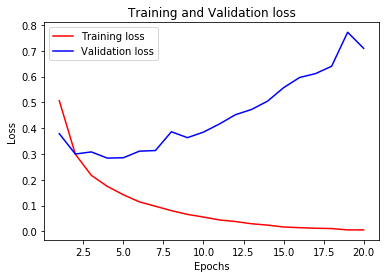

In [0]:
# 코드 3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt
%matplotlib inline

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

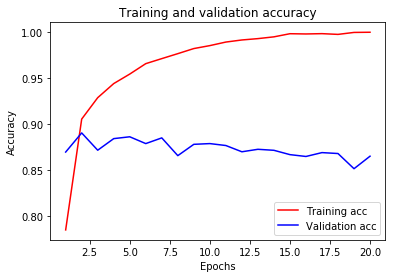

In [0]:
# 코드 3-10 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

훈련에 대한 결과는 기대했던 대로 나왔지만, 검증 손실과 정확도는 이와 같지 않습니다. 2번째 에포크 이후 부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못합니다. 이것을 **과대적합(overfitting)** 되었다고 합니다. 4번째 에포크에서 그래프가 역전되는 것 같으므로 오버피팅을 방지하기 위해 4번째 에포크까지 훈련을 다시 진행합니다.

In [0]:
# 코드 3-11 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 26s 1ms/step - loss: 0.4748 - acc: 0.8210
Epoch 2/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.2670 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 4s 149us/step - loss: 0.1990 - acc: 0.9291
Epoch 4/4
25000/25000 [==============================] - 60s 2ms/step


In [0]:
# 최종 결과
results

[0.3219839047527313, 0.87364]

### 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

predict 메소드를 사용해서 어떤 리뷰가 긍정이 확률을 예측할 수 있습니다.

In [0]:
model.predict(x_test)

array([[0.1379812 ],
       [0.99973017],
       [0.29972482],
       ...,
       [0.07407886],
       [0.04328284],
       [0.4806445 ]], dtype=float32)

이 모델은 어떤 샘플에 대해 확신을 갖고 있지만(0.99 또는 그 이상, 0.01 또는 그 이하) 어떤 샘플에 대해서는 확신이 부족합니다(0.48, 0.29).

### 3.4.6 추가 실험

생략

### 3.4.7 정리

* 원본 데이터를 신경망에 텐서로 주입하기 위해서는 많은 **전처리**가 필요합니다.
* 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 합니다.
* 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy입니다.
* rmsprop 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택입니다.
* 오버피팅을 막기 위해서는 항상 훈련 셋 이외의 데이터에서 성능을 모니터링해야 합니다.

## 3.5 뉴스 기사 분류: 다중 분류 문제

이번엔 2개 이상의 클래스, 즉 **다중 분류**(multiclass classification)의 예입니다. 로이터 뉴스를 46개의 토픽으로 분류하는 신경망을 만들어 보겠습니다.  
각 데이터 포인트가 정확히 하나의 범주로 분류되기 때문에 **단일 레이블 다중 분류** 문제입니다.

### 3.5.1 로이터 데이터셋

1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용합니다. 46개의 토픽이 있으며 토픽의 데이터 수는 서로 다릅니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.

In [0]:
# 코드 3-12 로이터 데이터셋 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


IMDB 데이터셋처럼 ```num_words=10000``` 매개변수는 데이터에서 가장 자주 등장하는 단어 1만 개로 제한합니다.

In [0]:
print('훈련 샘플: ',len(train_data))
print('테스트 샘플: ',len(test_data))

훈련 샘플:  8982
테스트 샘플:  2246


### 3.5.2 데이터 준비

IMDB 데이터셋처럼 데이터를 벡터로 변환합니다. 이번엔 레이블의 리스트를 정수 텐서로 변환하는 것 대신에 원-핫 인코딩을 사용하겠습니다.

In [0]:
# 코드 3-14 데이터 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

케라스에는 이미 이를 위한 내장 함수가 있습니다.

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3.5.3 모델 구성

IMDB와는 다른 점이 출력 클래스의 개수가 2에서 46개로 늘어난 점입니다. 이전에 사용했던 것처럼 Dense 층을 쌓으면 정보의 병목(information bottleneck)이 될 수 있습니다. 이전에는 16차원을 가진 중간층을 사용했지만 16차원 공간은 46개의 클래스를 구분하기에 너무 제약이 많습니다. 그러므로 이번엔 좀 더 큰 64개의 유닛을 사용합니다.

In [0]:
# 코드 3-15 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


여기서 주목해야 할 점이 2가지 있습니다.
* 마지막 Dense 층의 크기가 46입니다. 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻입니다.
* 마지막 층에 softmax 활성화 함수를 사용했습니다. 이는 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력합니다. 모두 더하면 1입니다.

이런 문제에서 사용할 최선의 손실 함수는 **categorical_crossentropy**입니다. 이 함수는 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리를 측정하고 이 거리를 최소화하도록 모델을 훈련합니다.

In [0]:
# 코드 3-16 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3.5.4 훈련 검증

훈련 데이터에서 1,000개의 샘플을 검증 셋으로 사용합니다.

In [0]:
# 코드 3-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

이제 20번의 에포크로 모델을 훈련시킵니다.

In [0]:
# 코드 3-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 304us/step - loss: 2.5285 - acc: 0.4969 - val_loss: 1.7217 - val_acc: 0.6080
Epoch 2/20
7982/7982 [==============================] - 2s 229us/step - loss: 1.4457 - acc: 0.6879 - val_loss: 1.3470 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 2s 248us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1700 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 2s 278us/step - loss: 0.8690 - acc: 0.8158 - val_loss: 1.0822 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 2s 243us/step - loss: 0.7030 - acc: 0.8478 - val_loss: 0.9848 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - ETA: 0s - loss: 0.5676 - acc: 0.879 - 2s 232us/step - loss: 0.5671 - acc: 0.8797 - val_loss: 0.9422 - val_acc: 0.8030
Epoch 7/20
7982/7982 [============================

손실과 정확도 곡선을 그립니다.

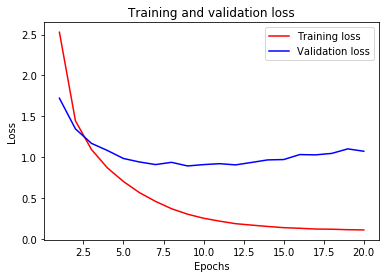

In [0]:
# 코드 3-19 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

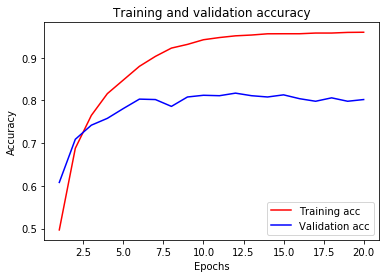

In [0]:
# 코드 3-20 훈련과 검증 정확도 그리기
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

이 모델은 9번째 에포크 이후에 오버피팅이 시작됩니다. 9번째 에포크로 새로운 모델을 훈련하고 테스트 셋에서 평가하겠습니다.

In [0]:
# 코드 3-21 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 309us/step - loss: 2.5407 - acc: 0.5228 - val_loss: 1.6816 - val_acc: 0.6520
Epoch 2/9
7982/7982 [==============================] - 2s 231us/step - loss: 1.3793 - acc: 0.7103 - val_loss: 1.2818 - val_acc: 0.7250
Epoch 3/9
7982/7982 [==============================] - 2s 235us/step - loss: 1.0229 - acc: 0.7784 - val_loss: 1.1369 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 2s 231us/step - loss: 0.8056 - acc: 0.8237 - val_loss: 1.0587 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 2s 240us/step - loss: 0.6459 - acc: 0.8612 - val_loss: 0.9755 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 2s 254us/step - loss: 0.5157 - acc: 0.8915 - val_loss: 0.9116 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 268us/step - loss: 0.4142 - acc: 0.9153 - val_loss: 0.8946 - val_acc: 0.8230
Epoch 8

In [0]:
results

[1.0258506061981962, 0.7756010686194165]

### 3.5.5 새로운 데이터에 대해 예측하기

생략

### 3.5.6 레이블과 손실을 다루는 방법

앞서 언급한 것처럼 레이블을 인코딩 하는 다른 방법은 정수 텐서로 변환하는 것입니다.

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

위 방식을 사용하려면 손실 함수 하나만 바꾸면 됩니다. 정수 레이블을 사용할때는 sparse_categorical_crossentropy를 사용해야 합니다. 이 손실 함수는 인터페이스만 다를 뿐 수학적으로는 categorical_crossentropy와 동일합니다.

In [0]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### 3.5.7 충분히 큰 중간층을 두어야 하는 이유

마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어서는 안됩니다. 46차원보다 훨씬 작은 중간층(예를 들면 4차원)을 두면 검증 정확도의 값은 약 71%로 원래보다 8%가 정도 감소되었습니다. 이렇게 정보의 병목현상이 일어날 수 있습니다.

### 3.5.8 추가 실험

생략

### 3.5.9 정리

* N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense 층의 크기는 N이어야 합니다.
* 단일 레이블, 다중 분류 문제에서는 softmax 활성화 함수를 사용해야 합니다.
* 이런 문제에선 항상 categorical_crossentropy를 사용해야 합니다.
* 다중 분류에서 레이블을 다루는 2가지 방법이 있습니다.
    - 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 categorical_crossentropy 손실 함수를 사용합니다.
    - 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수를 사용합니다.
* 네트워크에 정보의 병목이 생기지 않도록 주의 해야 합니다.

## 3.6 주택 가격 예측: 회귀 문제

이번에는 분류 문제가 아닌 **회귀**(regression) 문제입니다. 개별적인 레이블 대신에 연속적인 값을 예측합니다.

### 3.6.1 보스턴 주택 가격 데이터셋

1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측하는 문제입니다. 사용할 데이터의 특징은 다음과 같습니다.
* 데이터 포인트가 506개로 비교적 적습니다.
* 404개는 훈련 샘플, 102개는 테스트 샘플로 나뉘어 있습니다.
* 입력 데이터에  있는 각 특성(feature)(예를 들면 범죄율)은 스케일이 서로 다릅니다. [0~1], [1~12], [1~100]...

In [0]:
# 코드 3-24 보스턴 주택 데이터셋 로드하기
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 7us/step


모두 13개의 특성이 있습니다. 타깃은 주택의 중간 가격으로 천 달러 단위입니다.

### 3.6.2 데이터 준비

상이한 스케일을 가진 값을 신경망에 주입하면 문제가 됩니다. 이런 데이터를 다룰 대표적인 방법은 특성별로 **정규화**를 하는 것입니다.  
* 정규화는 여러 의미로 사용되기 때문에 **표준화**(standardization)라고 하면 정확히 이 방식입니다.

입력 데이터에 있는 각 특성에 대해서 특성의 평균을 빼고 표준 편차로 나눕니다. 특성의 중앙이 0 근처에 맞추어지고 표준 편차가 1이 됩니다.

In [0]:
# 코드 3-25 데이터 정규화하기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

**(매우 중요)** 테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값임을 주목해야 합니다! 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안됩니다!

### 3.6.3 모델 구성

샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용하겠습니다. 일반적으로 훈련 데이터의 개수가 적을수록 오버피팅이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 좋습니다.

In [0]:
# 코드 3-26 모델 정의하기
from keras import models
from keras import layers

def build_model():  # 동일한 모델을 여러 번 생성할 것이므로 함수 생성
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

다음 코드에서 확인할 수 있는 특징입니다.
* 이 네트워크의 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없습니다. 이것이 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성입니다.
* 이 모델은 **평균 제곱 오차**(mean squared error) 손실 함수를 사용합니다. (회귀 문제에서 많이 사용하는 손실 함수)(예측과 타깃 사이 거리의 제곱)
* 훈련하는 동안 모니터링을 위해 새로운 지표인 **평균 절대 오차**(mean absolute error)를 측정합니다.(예측과 타깃 사이 거리의 절댓값)

### 3.6.4 K-겹 검증을 사용한 훈련 검증

훈련 세트가 매우 적기 때문에 어떤 샘플이 검증 셋으로 선택되었는지에 따라 검증 점수가 달라지게 되고 신뢰 있는 평가를 할 수 없습니다.
이런 상황에서 가장 좋은 방법은 **K-겹 교차 검증**(K-fold cross-validation)을 사용하는 것입니다.
1. 데이터를 K개의 분할(즉 폴드(fold))로 나누고, K개의 모델을 만듭니다.
2. 각 모델에서는 K-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법입니다.
3. 모델의 검증 점수는 K개의 검증 점수 평균이 됩니다.

In [0]:
# 코드 3-27 K-겹 검증하기
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    
    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다.)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
Instructions for updating:
Use tf.cast instead.
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [0]:
print(all_scores)
print(np.mean(all_scores))

[2.2020992973063254, 2.1551319018448933, 2.859412894390597, 2.3581090303930905]
2.3936882809837265


검증 세트가 다르므로 확실히 검증 점수가 2.15에서 2.9까지 변화가 큽니다. 평균값(2.4)이 더 신뢰할 만합니다.  
신경망을 이번엔 500 epoch 동안 훈련해보면서 모델이 얼마나 개선되는지 기록하기 위해 검증 점수를 로그에 저장하겠습니다.

In [0]:
# 코드 3-28 각 폴드에서 검증 점수를 로그에 저장하기
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [0]:
# 코드 3-29 K-겹 검증 점수 평균 기록하기
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

그래프로 나타냅시다.

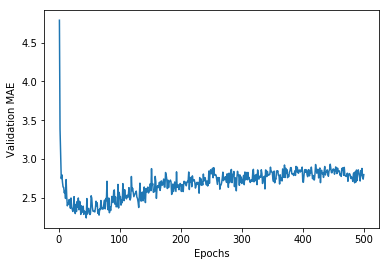

In [0]:
# 코드 3-30 검증 점수 그래프
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

위의 그래프는 범위가 크고 변동이 심해서 보기 어렵습니다. 그러므로 다음과 같이 변경합니다.
* 곡선의 다른 부분과 스케일이 많이 다른 첫 10개의 데이터 포인트를 제외시킵니다.
* 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 **지수 이동 평균**(exponential moving average)으로 대체합니다.

지수 이동 평균은 시계열 데이터를 부드럽게 만드는 기법 중 하나입니다. 이전에 계산된 이동 평균에 factor를 곱하고 현재 포인트에 (1-factor)를 곱해 합산하는 것입니다.

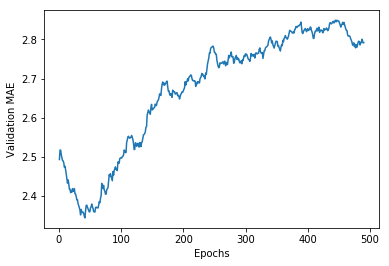

In [0]:
# 코드 3-31 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

이 그래프를 보면 검증 MAE가 80번째 에포크 이후에 줄어드는 것이 멈추고 이후 오버피팅이 시작됩니다.

In [0]:
# 코드 3-32 최종 모델 훈련하기
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [0]:
test_mae_score

2.687388335957247

아지 실제 가격과 2,687달러 정도 차이가 나는 것을 확인할 수 있습니다.

### 3.6.5 정리

* 회귀는 **평균 제곱 오차**(MSE) 손실 함수를 자주 사용합니다.
* 평가 지표는  **평균 절대 오차**(MAE)를 일반적으로 사용합니다.
* 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리에서 스케일 조정을 해야합니다.
* 가용 데이터가 적다면 K-겹 검증을 사용합니다.
* 훈련 데이터가 적다면 오버피팅을 피하기 위해 은닉 층의 수를 줄입니다.(일반적으로 1개 또는 2개)

## 3.7 요약

* 일반적인 머신러닝인 이진 분류, 다중 분류, 스칼라 회귀를 배웠습니다.
* 원본 데이터를 신경망에 주입하기 전에 전처리해야 합니다.
* 데이터에 범위가 다른 특성이 있다면 스케일 조정을 해야합니다.
* 훈련이 진행됨에 따라서 오버피팅이 시작됩니다.
* 훈련 데이터가 적다면 1개 또는 2개의 은닉 층을 사용합니다.
* 데이터가 많은 범주로 나뉘어 있을 때 중간층이 너무 작으면 정보의 병목이 생길 수 있습니다.
* 회귀는 분류와 다른 손실 함수와 평가 지표를 사용합니다.
* 적은 데이터를 사용할 때 K-겹 검증을 사용하는 것이 좋습니다.